In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import Fit.utils
from Fit import LocalTemplateFit
import scipy.optimize

In [14]:
nbins = 10
s, b0, b1, bins = Fit.utils.fake_templates(nbins, nsignal=4000, nbkgd0=5000, nbkgd1=5000)
total = s + b0 + b1
mock_data = np.random.poisson(1.2 * s + 0.8 * b0 + b1)
cov, inv = Fit.utils.cov_inv(Fit.utils.poisson_multiverse(total, nuniverses=100))
errors = np.sqrt(cov.diagonal() + 1 / total)

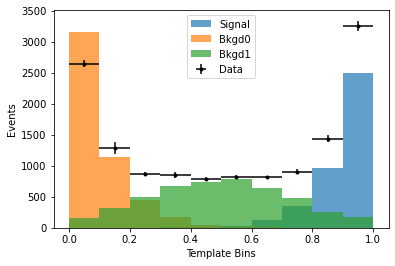

In [15]:
Fit.utils.plot_templates((s, b0, b1), ('Signal', 'Bkgd0', 'Bkgd1'), bins, data=mock_data, yerr=errors)


In [16]:
fit = LocalTemplateFit(cov, (s, b0, b1))

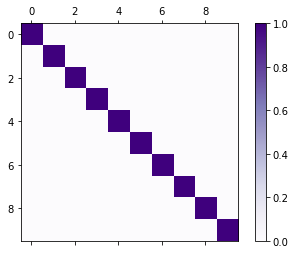

In [17]:
Fit.utils.plot_mat(np.dot(cov, inv))

In [18]:
fit.chisq((1.2, 0.8, 1), mock_data)
#fit.MINOS(mock_data)

7.312276142865722

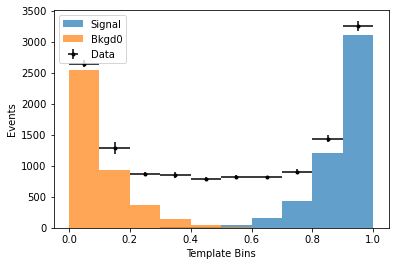

In [19]:
Fit.utils.plot_templates((s, b0), ('Signal', 'Bkgd0'), bins, data=mock_data, yerr=errors, scales=[1.24713854, 0.80609266])

In [8]:
cov.astype('longdouble').dtype

print('float64', np.linalg.cond(cov))
#print('float64', scipy.linalg.expm_cond(cov))
#print('longdouble', scipy.linalg.cond(cov.astype('longdouble')))


float64 1.1444018514888221e+18


In [9]:
cov

array([[ 769.84848485, -408.71717172,  -73.09090909, ..., -122.17171717,
        -275.66666667, -104.91919192],
       [-408.71717172, 1366.18181818,  215.7979798 , ...,  301.94949495,
         443.39393939,  -28.35353535],
       [ -73.09090909,  215.7979798 ,  549.88888889, ...,   27.55555556,
          90.07070707,  -50.23232323],
       ...,
       [-122.17171717,  301.94949495,   27.55555556, ...,  375.81818182,
         123.84848485,   -2.73737374],
       [-275.66666667,  443.39393939,   90.07070707, ...,  123.84848485,
         751.57575758,  -15.84848485],
       [-104.91919192,  -28.35353535,  -50.23232323, ...,   -2.73737374,
         -15.84848485,  470.85858586]])